In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_9_descriptive = get_prompt("descriptive", 9)
prompt_9_natural = get_prompt("natural", 9)

prompt_9_descriptive, prompt_9_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD of the simulation at 300 K. 6. Compute the radius of gyration over time for the simulation at 300 K. 7. Simulate for 1 ps at 400 K. 8. Compute the RMSD of the simulation at 400 K. 9. Compute the radius of gyration over time for the simulation at 400 K.',
 'Simulate 1LYZ for 1 ps at 300K and 400K. Report the secondary structure assignments of the PDB structure and any known binding or active sites. Compute RMSD and radius of gyration of both simulations.')

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- Simulation_2
- RMSD_2
- Rgy_2
- Binding/Active Sites

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(prompt_9_descriptive)

Thought: To complete all these tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's move on to the next task, which is to report the secondary structure assignments of the PDB structure.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_190032",
        "top_file": "1LYZ_190032",
        "target_frames": "first"
    }
}
```Thought: We've obtained the secondary structure assignments for 1LYZ. Now, let's find any known binding or active sites for this protein.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```Thought: We've obtained the UniProt ID for 1LYZ. Now, let's use this ID to find the known binding or active sites for this protein.

Action:
```
{
    "action": "GetAllKno

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_190032: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_190032
 rec0_190035: dssp values for trajectory with id: 1LYZ_190032
 1LYZ_190056: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_190100: Initial positions for simulation sim0_190100
 sim0_190100: Basic Simulation of Protein 1LYZ_190056
 rec0_190104: Simulation trajectory for protein 1LYZ_190056 and simulation sim0_190100
 rec1_190104: Simulation state log for protein 1LYZ_190056 and simulation sim0_190100
 rec2_190104: Simulation pdb frames for protein 1LYZ_190056 and simulation sim0_190100
 rmsd_190100: RMSD for 190100
 fig0_190546: RMSD plot for 190100
 rgy_rec0_190104: Radii of gyration per frame for rec0_190104
 fig0_190549: Plot of radii of gyration over time for rec0_190104
 top_sim0_190554: Initial positions for simulation sim0_190554
 sim0_190554: Basic Simulatio

In [7]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_190032"))

In [8]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_190032", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [9]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

In [17]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("sim0_190100")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_190100")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

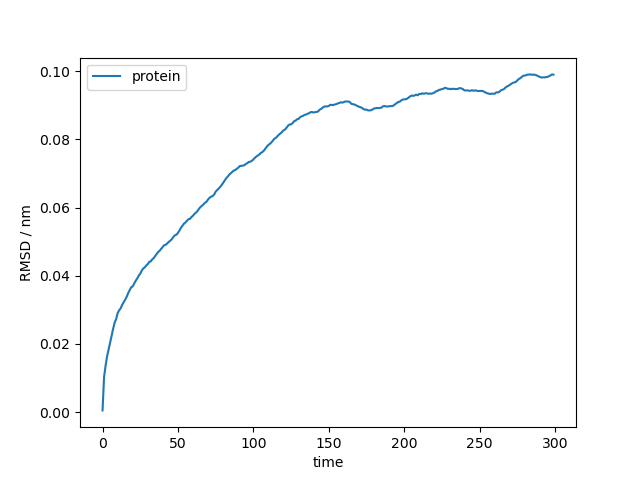

In [16]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_190546'))

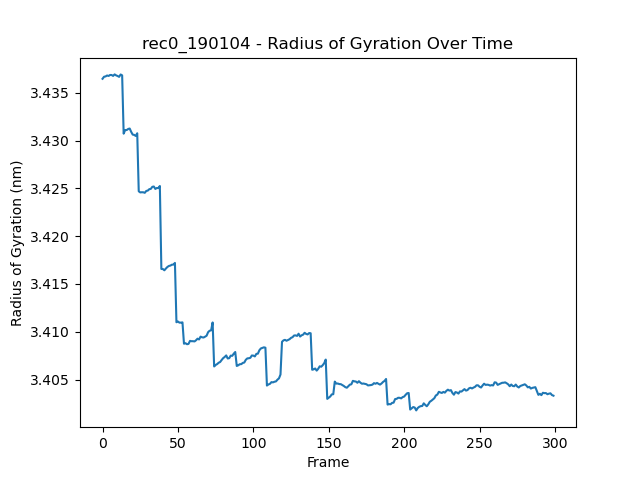

In [15]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_190549'))

In [14]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("sim0_190554")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_190554")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

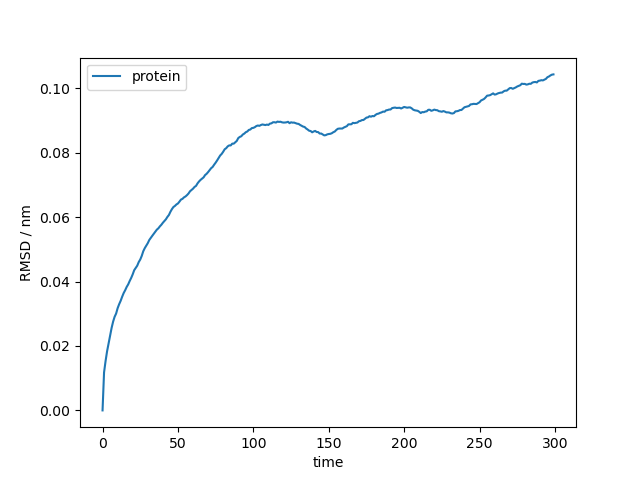

In [13]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_191206'))

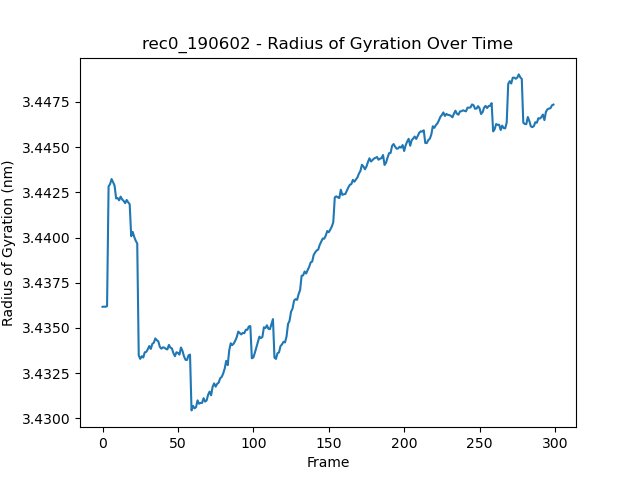

In [12]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_191210'))

In [18]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(prompt_9_natural)

Thought: To address this question, we need to follow several steps. First, we'll download the PDB file for 1LYZ, then run simulations at 300K and 400K, analyze the secondary structure, find binding and active sites, and finally compute RMSD and radius of gyration for both simulations. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's analyze the secondary structure of the PDB structure and find any known binding or active sites before we run the simulations.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_191530",
        "top_file": "1LYZ_191530",
        "target_frames": "first"
    }
}
```Thought: We've obtained the secondary structure information for 1LYZ. Now, let's find any known binding or active sites for this protein.

Action:
```
{
    "action": 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [19]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_191530: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_191530
 rec0_191533: dssp values for trajectory with id: 1LYZ_191530
 1LYZ_191551: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_191556: Initial positions for simulation sim0_191556
 sim0_191556: Basic Simulation of Protein 1LYZ_191551
 rec0_191601: Simulation trajectory for protein 1LYZ_191551 and simulation sim0_191556
 rec1_191601: Simulation state log for protein 1LYZ_191551 and simulation sim0_191556
 rec2_191601: Simulation pdb frames for protein 1LYZ_191551 and simulation sim0_191556
 top_sim0_192050: Initial positions for simulation sim0_192050
 sim0_192050: Basic Simulation of Protein 1LYZ_191551
 rec0_192055: Simulation trajectory for protein 1LYZ_191551 and simulation sim0_192050
 rec1_192055: Simulation state log for protein 1LYZ_191551 and simulation sim0_19

In [27]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_191530"))

In [26]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_191530", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [28]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P17897")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}, {'start': 71, 'start_modifier': 'EXACT', 'end': 71, 'end_modifier': 'EXACT', 'description': '', 'evidences': [{'evidenceCode': 'ECO:0000255', 'source': 'PROSITE-ProRule', 'id': 'PRU00680'}]}]\nNo known binding sites.\nNo other relevant sites."

In [25]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_191601")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_191556")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

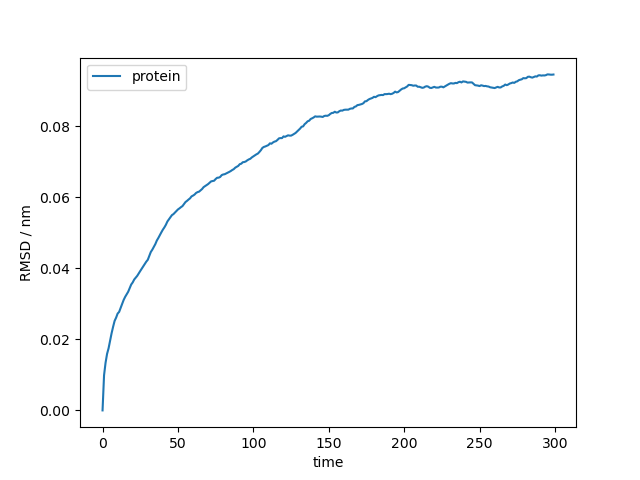

In [24]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_192648'))

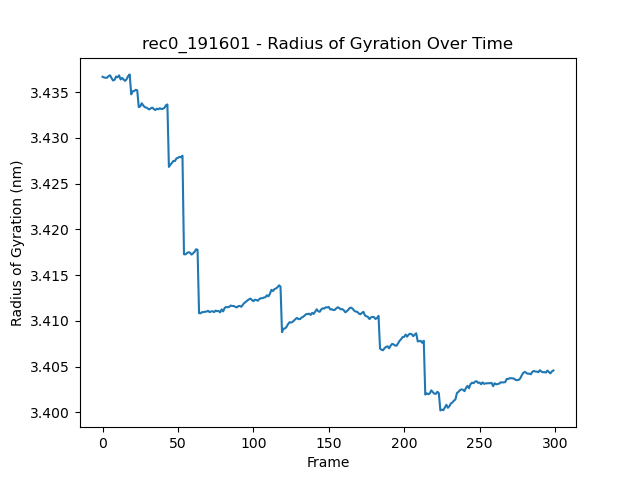

In [23]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_192652'))

In [22]:
# make sure trajectory and topology exist (sim1)
traj_path_2_2 = registry_2.get_mapped_path("rec0_192055")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_192050")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)

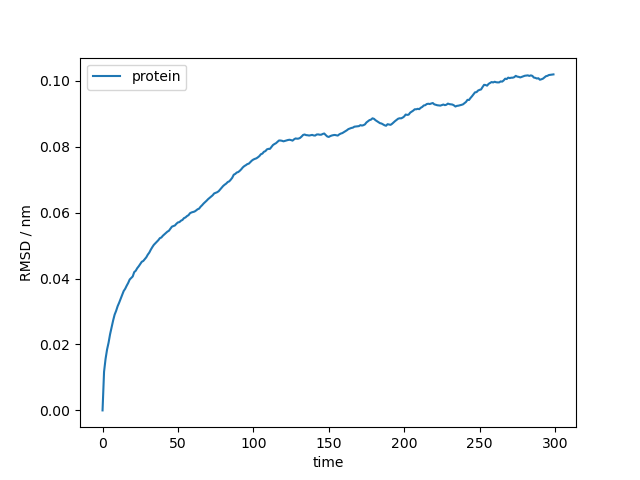

In [21]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_192657'))

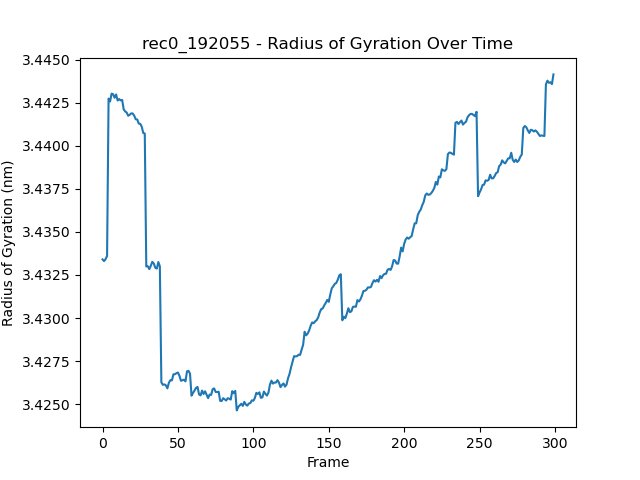

In [20]:
# make sure rgy plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_192701'))